In [3]:
from google.colab import files
uploaded = files.upload()

Saving Data Analyst - Test Data - US.csv to Data Analyst - Test Data - US.csv


In [4]:
!pip install nltk

In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

data = pd.read_csv('Data Analyst - Test Data - US.csv', parse_dates=['date'])
print(data.describe())
# print(data.head(1))
print()
print(data.info())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                       Review    date                  Location
count                                    6393    6448                      1711
unique                                   6383     397                      1082
top     Amazing\n  \n  Read more\n  Read less  Jun-19  United States of America
freq                                        4     145                       116

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB
None


### Review length statistics

count    6448.000000
mean      238.437345
std       212.410966
min         3.000000
25%       105.000000
50%       181.000000
75%       278.000000
max      1531.000000
dtype: float64



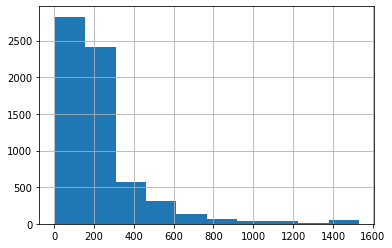

In [6]:
#lens = data["Review"].str.split().apply(lambda x: len(x))
# print(lens.describe())
# lens.hist()

lens = pd.Series(data['Review'].tolist()).astype(str)
# print(type(lens))
# print(lens.describe())
# print(lens.head(1))
# print(lens.describe())
lens_1 = lens.apply(lambda x: len(x))
print(lens_1.describe())
print()
lens_1.hist()

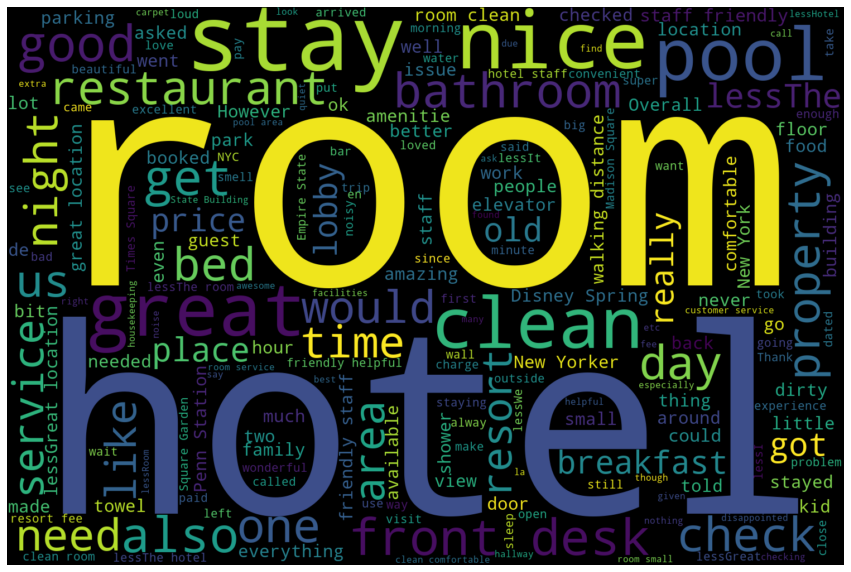

In [7]:
stop_list = stopwords.words('english')
stop_list.extend(('Read more', 'Read less', 'Read', 'read', 'less'))
cloud = WordCloud(width=1500, height=1000,
                  # stopwords=('https', 'https co', 'co', 'Read more', 'Read less', 'Read', 'and', 'the'), 
                  stopwords = stop_list,
                  colormap='viridis').generate(''.join(lens.astype(str)))
plt.figure(figsize=(15, 15))
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

co = CountVectorizer(stop_words=stop_list)
counts = co.fit_transform(lens)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)


,0
room,3512
hotel,3006
staff,1798
great,1637
location,1381
clean,1367
stay,1313
nice,1255
rooms,1116
good,977


In [9]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stop_list)

counts = co.fit_transform(lens)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)


,0
front desk,449
great location,343
staff friendly,271
new yorker,232
disney springs,196
walking distance,187
room clean,184
penn station,183
friendly staff,170
new york,153


In [12]:
co = CountVectorizer(ngram_range=(3,3),stop_words=stop_list)

counts = co.fit_transform(lens)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)


,0
empire state building,105
madison square garden,92
staff friendly helpful,74
within walking distance,73
front desk staff,63
would definitely stay,53
stayed new yorker,42
walking distance disney,40
stay new yorker,39
hotel great location,34


In [10]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

vectorizer = CountVectorizer(stop_words=stop_list)
model = vectorizer.fit(lens)
docs = vectorizer.transform(lens)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()
print_top_words(lda,vectorizer.get_feature_names(),10)


Topic #0: location great hotel close good square station easy penn restaurants
Topic #1: hotel service find reservation one daughter night house resort wyndham
Topic #2: check staff us stay great room early disneyland friendly helpful
Topic #3: room coffee fridge hotel mini hotels att beds och till
Topic #4: hotel new stay yorker would great room york location staff
Topic #5: disney great pool springs parks close shuttle hotel location resort
Topic #6: room hotel bed rooms booked check us small stayed king
Topic #7: di per la non posizione il con si hotel prices
Topic #8: parking valet free park room staff car street breakfast rooms
Topic #9: staff clean great friendly room nice location hotel good helpful
Topic #10: room bathroom hotel rooms dirty old like bed small shower
Topic #11: room desk front day us one water night would get
Topic #12: de et og la på est un en très var
Topic #13: parking fee breakfast hotel pay resort fees charge per like
Topic #14: like room people could hotel

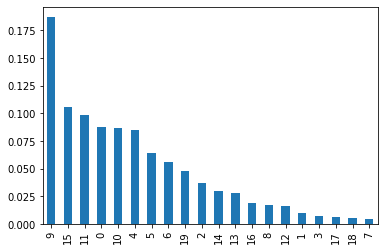

In [11]:
data['topic']=lda.transform(docs).argmax(axis=1)
data.topic.value_counts(normalize=True).plot.bar()


In [34]:
df2 = data[['Review']]
df2['date'] = pd.to_datetime(data['date'], errors='coerce')
df2.set_index('date', inplace=True)
print(df2.head(10))

# df2["Review_count"] = 
# df2.groupby(df2['date']).agg({'count'})
# print(df2.resample('MS').sum()) 
df2 = df2.resample('MS').sum()
print(df2.head(10))

df2['Review'].plot(label="Review count")
plt.title('Review Trend')
plt.legend(ncol=1)
plt.show()

                                                       Review
date                                                         
2019-08-20  I was very impressed with the resort.\n Great ...
2019-08-20  The rooms were nice the outside needs work als...
2019-08-20  Great location! I have stayed at this hotel on...
2019-08-20  The hotel was adequate for my stay. The strips...
2019-08-19  Great location, room was large and spacious. P...
2019-08-19  All the options for fun were great! Do wish th...
2019-08-19  Old. Musty. Motel. \n Bath need an update asap...
2019-08-19  Loved the layout of the hotel and the relaxing...
2019-08-19  My wife and I loved everything about it. It’s ...
2019-08-19  rooms were very small, was told i had a compli...
                                                       Review
date                                                         
NaT                                                       NaN
2018-01-01  I was very pleased with Resort. It’s a beautif...
2018-02-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: ignored

In [37]:
!pip install textblob

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


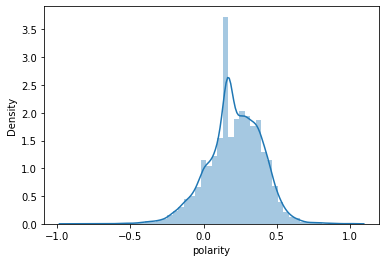

In [44]:
from textblob import TextBlob
import seaborn as sns

data['polarity']=data['Review'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

sns.distplot(data["polarity"],hist=True)

# Reference 
https://sushtend.com/machine-learning/exploratory-data-analysis-eda-on-nlp-text-data/?__cf_chl_jschl_tk__=pmd_Lmnw4WMbEXCApTEcZHqJr6tQcv5sZB5bA.M_VTAYz2U-1631643468-0-gqNtZGzNAiWjcnBszQkR

https://dair.ai/Exploratory_Data_Analysis_for_Text_Data/

https://www.kaggle.com/kingburrito666/better-donald-trump-tweets
